<h2></h2>
<p><span style="color: #0000ff;">Python: </span></p>
<ul>
<li><span style="color: #0000ff;">ciągi znaków i listy</span></li>
<li><span style="color: #0000ff;">pęlta for (klasyczna i z użyciem enumerate(lista)</span></li>
<li><span style="color: #0000ff;">konwersje typów </span><span style="color: #0000ff;">t (string=>lista, char->liczba),</span></li>
<li><span style="color: #0000ff;">tworzenie listy, operacje na listach</span></li>
<li><span style="color: #0000ff;">preprocesor Sage, typy</span></li>
</ul>

In [1]:
pi.n(digits=3)

3.14

<h2>Plan wykładu:</h2>
<ol>
<li>Wstęp: operacje na liczbach w języku python i systemie Sage.</li>
<li>Reprezentacja liczb w komputerze: 
<ul>
<li>systemy addytywne i pozycyjne</li>
<li>przedstawienie liczb całkowitych w dwójkowym (binarny) systemie liczbowym</li>
<li>zmiana systemu liczbowego (ćwiczenia)</li>
<li>zapis liczb rzeczywistych</li>
</ul>
</li>
<li>Liczby zmiennoprzeycinkowe</li>
<li>Konsekwencje operacji na liczbach o skończonej prezycji.
<ul>
<p> </p>
</ul>
</li>
</ol>

In [2]:
21==2*10+1

True

<p>Zapis liczby $21$ jest w systemie pozycyjnym ciagiem znaków (ang. string), "2" i "1".</p>

In [3]:
x = 21
x

21

In [4]:
str='21'
str

'21'

<p>wypiszmy te znaki jedem po drugim:</p>

In [5]:
l = ['a','b','c']
i=0
for z in l:
    print i,z 
    i = i+1

0 a
1 b
2 c


In [6]:
l = ['a','b','c']
for i in range(len(l)):
    print i,l[i]

0 a
1 b
2 c


In [7]:
b,c = 1,2
print b,c

1 2


In [8]:
l = ['a','b','c']
for i,z in enumerate(l):
    print i,z

0 a
1 b
2 c


In [9]:
list(enumerate(l))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [10]:
for b,c in [(0, 'a'), (1, 'b'), (2, 'c')]:
    print b,c

0 a
1 b
2 c


In [11]:
str = '21' 
for l in str:
    print l

2
1


In [12]:
list(reversed(list(str)))

['1', '2']

In [13]:
for n,d in enumerate(reversed(list(str))):
    print n,d

0 1
1 2


<p>z tych znaków możemy "złożyć" liczbę, stosując wzór: </p>
<p>$$21 = 2\cdot 10^1 + 1\cdot 10^0. $$</p>

In [14]:
int("a2")

ValueError: invalid literal for int() with base 10: 'a2'

In [15]:
int('12')

12

In [16]:
l = []
for i in range(5):
    l.append(2**i)
l

[1, 2, 4, 8, 16]

In [17]:
[2**3 for i in range(5)]

[8, 8, 8, 8, 8]

In [18]:
sum ( [int(d)*10^(n) for n,d in enumerate(reversed(list(str)))] )

21

<p>Weźmy teraz liczbę $n$ będącą licznbą całkowitą w Sage:</p>

In [19]:
n = 21
type(n)

<type 'sage.rings.integer.Integer'>

<p>Chociaż tego nigdzie nie deklarowaliśmy, $n$ jest objektem Integer a nie typem prostym języka python "int". Magicznie zadziałał za nas preparser w Sage:</p>

In [20]:
preparse('n=21')

'n=Integer(21)'

<p>Objekt Integer ma wiele użytecznych  metod, np.:</p>

In [21]:
n.

SyntaxError: invalid syntax (<ipython-input-21-9ae45436400c>, line 1)

In [22]:
n.nbits()

5

<h2>Zmiana reprezentacji - z dwójkowej na dziesiętną.</h2>

In [23]:
str=n.binary()
str

'10101'

<p>Jak możemy znając przedstawienie dziesiętne, obliczyć reprezentacje danej liczby w systemie binarnym?</p>
<p>Oczywiście mamy do tego narzędzia w Sage:</p>

In [24]:
(21).binary()

'10101'

<p>Jednak jak można sobie poradzić ich nie mając (lub używając czystego pythona)? </p>
<p>Możemy do tego wykorzystać dzielenie z resztą i dzielenie modulo (lub innymi słowami znanego ze szkoły dzielenia z resztą). Wystartujmy od naszej liczby. Podzielmy ją z resztą przez 2, a następnie zapiszemy sobie resztę a wynik potraktujemy jako nową liczbę wejsciowa. Kontynuujać aż otrzymamy w wyniku zero, taka procedura da nam listę reszt. Liest ta  będzie reprezentacją binarną liczby wyjsciowej, ale w odwróconej kolejności.  </p>
<p>Na początej jednak wyróbujmy dzielenie z resztą:</p>

In [25]:
print "modulo ",21%2
print "dzielenie ",21/2
print "dzielenie całkowite ", int(21)/int(2)
print "dzielenie z resztą z Sage ", (21).quo_rem(2)

modulo  1
dzielenie  21/2
dzielenie całkowite  10
dzielenie z resztą z Sage  (10, 1)


<p>Zauważmy, że operatory % i /  dadzą nam poprawne wartości dzielenia modulo i części całkowitej z dzielenia tylko jeśli ich argumenty (tzn n i r) będą typami 'int'. W Sage kazda liczba jest automatycznie zamieniana na objekt np. Integer. Są trzy sposoby by obejść to niepotrzebne w tej chwili udogodnienie:</p>
<ol>
<li>Skorzystać z czytego pythona.</li>
<li>Wykonać cast do "int"</li>
<li>Użyć metody   'quo_rem', która jest niczym innym jak właśnie dzieleniem z resztą.</li>
</ol>
<p>Poniżej znajduje się  implementacja:</p>

In [29]:
%%python
n = 23
while n>0:
    n,r = n//2,n%2
    print n,r

11 1
5 1
2 1
1 0
0 1


In [28]:
n = 23
while n>0:
    n,r = int(n)/int(2),n%2
    print n,r

11 1
5 1
2 1
1 0
0 1


In [33]:
n=23
while n>0:
    n,r = n.quo_rem(2)
    print n,r

11 1
5 1
2 1
1 0
0 1


<p>Zamiast na ekran, zapiszmy sobie wynik do tablicy, by można było z niego złożyć reprezentacje binarną liczby.</p>

In [34]:
n=23
n_binary=[]
while n>0:
    n,r = n.quo_rem(2)
    n_binary.append(r)

<p>Złożenie wymaga użycia operacji join, która w pythonie z listy robi ciąg znaków. (warto pamiętać, że odwrotną operacją jest "split").</p>

In [40]:
str="".join([ i.str() for i in reversed(n_binary)])
str

'10111'

<p>Na koniec sprawdźmy czy wynik jest poprawny, korzystając bezpośrednio z definicji reprezentacji binarnej:</p>

In [41]:
sum ( [int(d)*2^(n) for n,d in enumerate(reversed(list(str)))] )

23

<p>Czyli jest OK!</p>

<h3>Ułamki dziesiętne.</h3>
<p>W systemie dwójkowym można przedstawiać również liczby rzeczywiste. Na przykład ułamek dziesiętny o podstawie 2 można zapisać jako:</p>
<p>$$0.101_{2}=0\cdot 2^0 + 1 \cdot 2^{-1} + 0 \cdot 2^{-2} + 1 \cdot 2^{-3} = 0.625_{10}\;.$$</p>
<p> </p>

<p>Liczby rzeczywiste w Sage są reprezentowane przez klasę reprezentującą liczby rzeczywiste. Jest ona w stanie obslugiwać liczby o dowolnej precyzji oraz posiada wiele użytecznych metod. </p>

In [42]:
x=1.2
print type (x)
print preparse('x=1.2')

<type 'sage.rings.real_mpfr.RealLiteral'>
x=RealNumber('1.2')


<p>Można m.in. otrzymać reprezentację binarna danej liczby:</p>

In [43]:
(0.625).str(base=2)

'0.10100000000000000000000000000000000000000000000000000'

<p>W drugą stronę: tworząc liczbę rzeczywistą z ciągu znaków, możemy jawnie podać reprezentację:</p>

In [44]:
x = RealNumber('0.101',base=2)
x

0.625000000000000

<p>Część całkowitą liczby rzeczywistej możemy uzyskać stosując zarówno funkcję pythonową floor jak i metodę floor:</p>

In [45]:
x=1.2
print "funkcja floor",x,floor(x)
print "metoda floor",x,x.floor()

funkcja floor 1.20000000000000 1
metoda floor 1.20000000000000 1


In [46]:
print "czesc dziesietna",x-floor(x)

czesc dziesietna 0.200000000000000


<p>Aby wyznaczyć reprezentację dwójkową liczny rzeczywistej, możemy rozbić ją na część całkowitą i dziesiętną. Część całkowitą zamieniamy według znanego algorytmu ma postać dwójkową a z częścią dziesiętną postępujemy inaczej. Mnożymy ją przez 2 i zaposujemy części całkowite wyniku: </p>

In [47]:
n=0.21
licznik=0
n_binary=[]
while True:
    licznik=licznik+1
    n=n*2 
    r=int(n)
    n=n-floor(n)  
    n_binary.append(r)
    if  n==0 or licznik>20:
        break
n_binary

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]

<h2>Liczby zmiennoprzecinkowe</h2>
<p><img style="vertical-align: middle;" src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/IEEE-754-single1.svg/799px-IEEE-754-single1.svg.png" alt="" width="799" height="168" /></p>
<p><a href="http://pl.wikipedia.org/wiki/IEEE_754">http://pl.wikipedia.org/wiki/IEEE_754</a></p>

In [90]:
x=.1

<type 'sage.rings.real_mpfr.RealLiteral'>

In [49]:
sign,mantissa,exponent=x.sign_mantissa_exponent()
sign,mantissa,exponent

(1, 7205759403792794, -56)

In [50]:
xx=N(5939122008594842*2^(-48))

In [51]:
xx

21.1000000000000

In [52]:
xx.str(truncate=False)

'21.100000000000001'

In [53]:
(mantissa*2^exponent).n()

0.100000000000000

In [54]:
x=0.4

In [55]:
x.str(base=2,truncate=False)

'0.011001100110011001100110011001100110011001100110011010'

In [56]:
x.prec()

53

In [57]:
sign,mantissa,exponent=x.sign_mantissa_exponent()
sign,mantissa,exponent

(1, 7205759403792794, -54)

In [58]:
(mantissa*2^exponent).n(digits=100)

0.4000000000000000222044604925031308084726333618164062500000000000000000000000000000000000000000000000

<h3>Przykład arytmetyka pięciobitowa:</h3>
<p>Wyobraźmy sobie, że mamy 2-bitową mantysę i  2-bitowy eksponent. Wtedy:</p>
<p>$$1.b_1b_2\times 2^{k-2},$$ gdzie $b_1$ i $b_2$ mogą przybierać wartości $0$ i $1$  a $k$: $0,1,2,3$.</p>

In [59]:
x=RR('1.01',base=2)

In [60]:
print x.str(base=2)
print x.str(base=10)

1.0100000000000000000000000000000000000000000000000000
1.25000000000000


In [61]:
b=12
print "Liczba jest mniejsza niz :%d  lub %d" % (b,b*2)

Liczba jest mniejsza niz :12  lub 24


In [64]:
num_tbl=[[ r'$1.%d%d \times 2^{%d}$' %(b1,b2,k-2),(RR('1.%d%d'%(b1,b2),base=2)*2^(k-1)).exact_rational(),RR('1.%d%d'%(b1,b2),base=2)*2^(k-1)] for b1,b2,k in CartesianProduct([0,1],[0,1],[0,1,2,3])]

num_tbl.sort(key=lambda x:x[2])

# sortowanie tableli przez itemgetter
# from operator import itemgetter
# num_tbl.sort(key=itemgetter(2))

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: CartesianProduct is deprecated. Use cartesian_product instead
See http://trac.sagemath.org/18411 for details.
  from ipykernel.kernelapp import IPKernelApp


In [92]:
html.table( num_tbl )

,,
,,
,,
,,
,,
,,
,,
,,
,,
,,
,,


<p>Cała arytmetyka jest reprezentowana przez zaledwie 16 różnych liczb:</p>

In [66]:
len(num_tbl)

16

In [67]:
nums=[ i[2] for i in num_tbl]

<p>Narysujmy te liczby na osi liczbowej:</p>

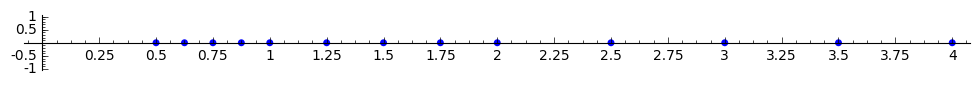

In [68]:
points(zip(nums,[0]*len(nums)),pointsize=25,ticks=[1/4,None]).show(xmin=0,xmax=4,figsize=[10,1] )

<p>Zbadajmy system 64 bitowych liczb zmiennoprzycinkowych mantysa ze znakiem 53bity + 11 bitów wykładnik:</p>

In [69]:
x=1.0

In [70]:
x.nextabove().str(truncate=False)

'1.0000000000000002'

In [71]:
x.str(base=2)

'1.0000000000000000000000000000000000000000000000000000'

In [72]:
x.nextabove().str(base=2)

'1.0000000000000000000000000000000000000000000000000001'

In [73]:
x.nextbelow().str(base=2)

'0.11111111111111111111111111111111111111111111111111111'

In [74]:
x.nextbelow().str(truncate=False)

'0.99999999999999989'

In [75]:
x.nextabove().str(truncate=False)

'1.0000000000000002'

In [76]:
x.nextbelow().str(base=2)

'0.11111111111111111111111111111111111111111111111111111'

In [77]:
x.nextabove()-x

2.22044604925031e-16

In [78]:
x.nextbelow()-x

-1.11022302462516e-16

In [79]:
print "%e" % 1234

1.234000e+03


In [80]:
x=21

In [81]:
x.str(base=2)

'10101'

<h2>Konsekwencje operacji na liczbach o skończonej precyzji</h2>

<p>Liczba 0.1 nie jest reprezentowana dokładnie!</p>

In [82]:
10 * (1.1 -1) - 1

8.88178419700125e-16

<p>Należy unikać porównań typu:</p>
<pre>if (x == 1.0)<br />{<br />....<br />}</pre>

In [83]:
type(1)

<type 'sage.rings.integer.Integer'>

In [84]:
1/2+1/3

5/6

In [85]:

sum = 0.0
for i in range(1000000):
    sum += 0.1
print(sum)

100000.000001333


In [86]:
sum = 0.0
for i in range(1000000):
    sum += 0.1
sum

100000.000001333

In [87]:
var('x')

x

In [88]:
((x-1)^4).expand()

x^4 - 4*x^3 + 6*x^2 - 4*x + 1

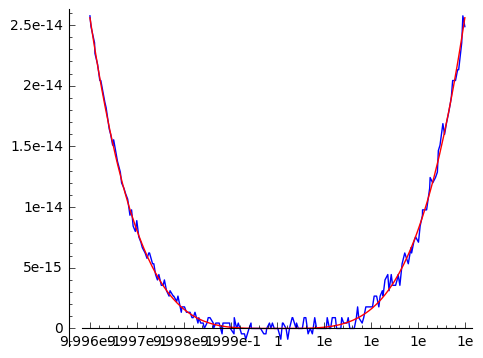

In [89]:
plot(x^4 - 4*x^3 + 6*x^2 - 4*x + 1,(x,0.9996,1.0004) ) + plot((x-1)^4,(x,0.9996,1.0004),color='red',figsize=5 )

<h3>Liczby zmiennoprzecinkowe na osi rzeczywistej, dla różnych precyzji (wykorzystując Sage - RealNumber).</h3>

    @interact
    def _(p=slider( range(2,10) ) ):
        x=1.
        xf=x.n(prec=p)
        xf_lst=[]
        while xf<=31:
            xf_lst.append(xf)
            xf=xf.nextabove()
        x=1.
        xf=x.n(prec=p)
        while xf>=.1:
            xf=xf.nextbelow() 
            xf_lst.append(xf) 
    #        ,ticks=[1/4,None]
        points(zip(xf_lst,[0]*len(xf_lst)),pointsize=25).show(xmin=0,xmax=31,figsize=[15,1] )